In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 25


In [2]:


tennis_dataset = TennisMatchDataset([   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        # 'past-wimbledon-2023-atp-singles',
                                        # 'past-hamburg-2023-atp-singles',
                                        #   'past-bastad-2023-atp-singles',
                                        #   'past-gstaad-2023-atp-singles', ###
                                        #   'past-newport-2023-atp-singles',
                                        #   'past-umag-2023-atp-singles',
                                        #   'past-atlanta-2023-atp-singles',
                                        #   'past-washington-2023-atp-singles',
                                        #   # 'past-montreal-2023-atp-singles', ###
                                        #   'past-cincinnati-2023-atp-singles',
                                        #   'past-winston-salem-2023-atp-singles',
                                        #   'past-us-open-2023-atp-singles', ###
                                        #   'past-chengdu-2023-atp-singles',
                                        #   'past-zhuhai-2023-atp-singles', ###
                                        #   'past-tokyo-2023-atp-singles',
                                        #   'past-beijing-2023-atp-singles', ###
                                        #   'past-shanghai-2023-atp-singles',
                                        #   'past-stockholm-2023-atp-singles',
                                        #   'past-antwerp-2023-atp-singles', ###
                                        #   # 'past-almaty-2023-atp-singles', ###
                                        #   'past-vienna-2023-atp-singles',
                                        #   'past-basel-2023-atp-singles',
                                        #   'past-paris-2023-atp-singles',
                                        #   'past-metz-2023-atp-singles',
                                        #   'past-finals-turin-2023-atp-singles',
                                     ])

Loading data for tournaments {'past-marseille-atp-singles', 'past-acapulco-atp-singles', 'past-estoril-2023-atp-singles', 'past-marrakech-2023-atp-singles', 'past-auckland-atp-singles', 'past-monte-carlo-2023-atp-singles', 'past-cordoba-2023-atp-singles', 'past-rome-atp-singles', 'past-monte-carlo-atp-singles', 'past-bucharest-atp-singles', 'past-geneva-atp-singles', 'past-montpellier-2023-atp-singles', 'past-french-open-atp-singles', 'past-adelaide-atp-singles', 'past-madrid-2023-atp-singles', 'past-doha-2023-atp-singles', 'past-barcelona-atp-singles', 'past-dubai-atp-singles', 'past-miami-atp-singles', 'past-geneva-2023-atp-singles', 'past-marrakech-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-dubai-2023-atp-singles', 'past-australian-open-2023-atp-singles', 'past-brisbane-atp-singles', 'past-marseille-2023-atp-singles', 'past-stuttgart-2023-atp-singles', 'past-australian-open-atp-singles', 'past-santiago-2023-atp-singles', 'past-hertogenbosch-2023-atp-singles', 'past-mu

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Error 'm0c2' for match Ea8H7vIs in tournament past-marseille-atp-singles
Error 'm0c2' for match E5731zbh in tournament past-marseille-atp-singles
Error 'rh88' for match foC1GUZO in tournament past-acapulco-atp-singles
Error 's483' for match MVj0W5n6 in tournament past-estoril-2023-atp-singles
Error 'ch90' for match zZdiOYmk in tournament past-estoril-2023-atp-singles
Error 's483' for match 0dIpBJlC in tournament past-estoril-2023-atp-singles


 11%|█         | 6/57 [00:00<00:01, 45.06it/s]

Error 's483' for match 4ISXadem in tournament past-estoril-2023-atp-singles
Error 'c0jt' for match YquGsFuJ in tournament past-estoril-2023-atp-singles
Error 'mp94' for match CfGRKpug in tournament past-marrakech-2023-atp-singles
Error 'l0ck' for match YNq1gu5J in tournament past-marrakech-2023-atp-singles
Error 'bt68' for match IeLXmJSt in tournament past-marrakech-2023-atp-singles
Error 'a0ey' for match U13pNgIm in tournament past-marrakech-2023-atp-singles
Error 'p0j3' for match bse1JBHC in tournament past-marrakech-2023-atp-singles
Error 'c882' for match GfN9TeuK in tournament past-marrakech-2023-atp-singles
Error 'l0ip' for match A3JXyz3k in tournament past-auckland-atp-singles
Error 's0w8' for match dxBBWvR9 in tournament past-auckland-atp-singles
Error 'l0ip' for match hxGoE2z2 in tournament past-auckland-atp-singles
Error 'kg53' for match GAVSpGTT in tournament past-auckland-atp-singles
Error 'b0hy' for match Iwt2dxE7 in tournament past-auckland-atp-singles
Error 'dc38' for mat

 19%|█▉        | 11/57 [00:00<00:01, 29.20it/s]

Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Error 'cn78' for match t6WtxZHD in tournament past-monte-carlo-atp-singles
Error 'm0cj' for match bs1RqoyK in tournament past-monte-carlo-atp-singles
Error 'pl80' for match 6VCWfDCi in tournament past-bucharest-atp-singles
Error 't0hs' for match rmhbGCmf in tournament past-geneva-atp-singles
Error 'j09f' for match MiOtsy3e in tournament past-geneva-atp-singles
Error 't0hs' for match Odtfjut9 in tournament past-geneva-atp-singles
Error 'g0a0' for match ClHJbEzs in tournament past-montpellier-2023-atp-singles
Error 'kb05' for match xnoi3O26 in tournament past-montpellier-2023-atp-singles
Error 'g0a0' for match Ek1DoUDH in tournament past-montpellier-2023-atp-singles
Error 'kb05' for match vXYZ2Vrh in tournament past-montpellier-2023-atp-singles
Error 'o411' for match 2yLEWIhq in tournament past-montpellier-2023-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'm0tb' for match p

 33%|███▎      | 19/57 [00:00<00:01, 27.23it/s]

Error 'b0ot' for match MeEf1K6s in tournament past-adelaide-atp-singles
Error 'kb05' for match 2FDcZwyg in tournament past-madrid-2023-atp-singles
Error 'g0a0' for match lWaJUFkO in tournament past-madrid-2023-atp-singles
Error 'ca12' for match trhqK7Vl in tournament past-madrid-2023-atp-singles
Error 'j0dg' for match AmsXXVl3 in tournament past-madrid-2023-atp-singles
Error 'c882' for match WzefEQp8 in tournament past-madrid-2023-atp-singles
Error 'ch90' for match jJrmkYDO in tournament past-madrid-2023-atp-singles
Error 'bd80' for match OAVG07G8 in tournament past-madrid-2023-atp-singles
Error 'v306' for match 4UzkCnmb in tournament past-doha-2023-atp-singles
Error 'pf36' for match x2avghec in tournament past-doha-2023-atp-singles
Error 'a09u' for match ILzioZ34 in tournament past-barcelona-atp-singles
Error 'a0ea' for match ULVWyVQj in tournament past-barcelona-atp-singles
Error 'pd07' for match hlpsiC1T in tournament past-dubai-atp-singles
Error 'm0c2' for match ELRtTeAj in tournam

 40%|████      | 23/57 [00:00<00:01, 29.14it/s]

Error 'bt68' for match nLKD84k8 in tournament past-marrakech-atp-singles
Error 'mo55' for match 2grE6fA7 in tournament past-marrakech-atp-singles
Error 'm0gy' for match 0GMWK2FB in tournament past-marrakech-atp-singles
Error 'i0b3' for match EazBPQ0t in tournament past-marrakech-atp-singles
Error 'mo55' for match UilHvdTJ in tournament past-marrakech-atp-singles
Error 'l0id' for match juKrx2rH in tournament past-indian-wells-2023-atp-singles
Error 'l0id' for match rydfWdCL in tournament past-indian-wells-2023-atp-singles
Error 'g0a0' for match x4z0CyLk in tournament past-indian-wells-2023-atp-singles
Error 'kb05' for match dKgrZbS2 in tournament past-indian-wells-2023-atp-singles
Error 'c882' for match dfxBcO2b in tournament past-indian-wells-2023-atp-singles
Error 'b0oy' for match MRvrzfVn in tournament past-indian-wells-2023-atp-singles
Error 'c882' for match nk6BRFdC in tournament past-indian-wells-2023-atp-singles
Error 'ga36' for match KxFfVccm in tournament past-indian-wells-2023

 47%|████▋     | 27/57 [00:01<00:01, 26.57it/s]

Error 'c882' for match htfqLMkU in tournament past-australian-open-2023-atp-singles
Error 'p0kj' for match v92JifQ8 in tournament past-australian-open-2023-atp-singles
Error 'fc26' for match 8W0YE85q in tournament past-australian-open-2023-atp-singles
Error 'j0d4' for match QTOcvpjh in tournament past-australian-open-2023-atp-singles
Error 'z246' for match Cb2viNZc in tournament past-australian-open-2023-atp-singles
Error 'kb54' for match beGbbuUM in tournament past-brisbane-atp-singles
Error 'b0ot' for match GWnPE0E3 in tournament past-brisbane-atp-singles
Error 'c882' for match 8Ucheze1 in tournament past-marseille-2023-atp-singles
Error 'g0a0' for match z7UCUcN1 in tournament past-marseille-2023-atp-singles
Error 'kb05' for match EcTGTHx8 in tournament past-marseille-2023-atp-singles
Error 'l397' for match dvrgn9ye in tournament past-stuttgart-2023-atp-singles
Error 'o659' for match fBkyM5g4 in tournament past-stuttgart-2023-atp-singles
Error 'c977' for match prLzS6cc in tournament 

 61%|██████▏   | 35/57 [00:01<00:00, 26.51it/s]

Error 'j0dg' for match 2XlocLv9 in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match xdWNSUb1 in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match z9esrzdS in tournament past-santiago-2023-atp-singles
Error 'j0dg' for match WMPRVeL2 in tournament past-santiago-2023-atp-singles
Error 'lb07' for match IwSwTg5L in tournament past-santiago-2023-atp-singles
Error 'g0a0' for match AVoR4TAs in tournament past-hertogenbosch-2023-atp-singles
Error 'g0a0' for match dOHN0qx9 in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match 0K0fBYfH in tournament past-hertogenbosch-2023-atp-singles
Error 'c0jt' for match xhjypiPk in tournament past-hertogenbosch-2023-atp-singles
Error 'ld26' for match QDWV5Yo9 in tournament past-hertogenbosch-2023-atp-singles
Error 'dc83' for match KGutqBvd in tournament past-hertogenbosch-2023-atp-singles
Error 'd0d2' for match nNXR6EW2 in tournament past-hertogenbosch-2023-atp-singles
Error 'l0fv' for match nolBXzFh in tourna

 72%|███████▏  | 41/57 [00:01<00:00, 27.74it/s]

Error 'g0a0' for match 44qARdQc in tournament past-munich-atp-singles
Error 'k0j9' for match WKCcIhmp in tournament past-munich-atp-singles
Error 'lf29' for match OG8zcwph in tournament past-lyon-2023-atp-singles
Error 'lf29' for match dKVJr8VI in tournament past-lyon-2023-atp-singles
Error 'lf29' for match ADUBY9So in tournament past-lyon-2023-atp-singles
Error 'pf36' for match 2iqJAo3i in tournament past-doha-atp-singles
Error 'm0tb' for match AiHXv46S in tournament past-french-open-2023-atp-singles
Error 'kb05' for match WlhFfhNp in tournament past-french-open-2023-atp-singles
Error 'g0a0' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match G4nCAKp6 in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match 88WOtzz5 in tournament past-french-open-2023-atp-singles
Error 't0hs' for match MFtGiABs in tournament past-french-open-2023-atp-singles
Error 'ch90' for match 8rN3Pz5E in tournament past-french-open-2023-atp-singles
Error 'gb93' 

 86%|████████▌ | 49/57 [00:01<00:00, 30.87it/s]

Error 'd0c3' for match 48uC8Mw2 in tournament past-indian-wells-atp-singles
Error 'd0c3' for match MR8lpva5 in tournament past-indian-wells-atp-singles
Error 'w0dw' for match KvQx7AK1 in tournament past-indian-wells-atp-singles
Error 'd0c3' for match xdSllRqe in tournament past-indian-wells-atp-singles
Error 'd0d4' for match nVT0FYCL in tournament past-indian-wells-atp-singles
Error 'v09t' for match t60fPLDt in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match beWL18hb in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 6irdkFW9 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match MPFbjYNf in tournament past-rio-de-janeiro-2023-atp-singles
Error 'r09v' for match Yqg39oAs in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 2PpK5396 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'l0id' for match v5v6nXff in tournament past-houston-2023-atp-singles
Error 'ga36' for match M3SkhWoA in tournament 

 93%|█████████▎| 53/57 [00:01<00:00, 29.31it/s]

Error 'm0tb' for match EX1Eujsq in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'g0dl' for match nZD6zZDR in tournament past-cordoba-atp-singles
Error 'j0dg' for match 4AO1yFbL in tournament past-cordoba-atp-singles
Error 'm0tb' for match ravgCiCA in tournament past-cordoba-atp-singles
Error 'g0dl' for match YBZOKIa6 in tournament past-cordoba-atp-singles
Error 'm0tb' for match U5sWHNcO in tournament past-cordoba-atp-singles
Error 'g0dl' for match h0n7NRTn in tournament past-cordoba-atp-singles
Error 'kc29' for match 0QkFL5ba in tournament past-cordoba-atp-singles
Error 'ca12' for match 8ngpoloB in tournament past-rome-2023-atp-singles
Error 'g0a0' for match tGuGb7FA in tournament past-rome-2023-atp-singles
Error 'j0dg' for match W6eQu5A4 in tournament past-rome-2023-atp-singles
Error 'kb05' for match IuTRWcQ0 in tournament past-rome-2023-atp-singles
Error 'j0dg' for match 46A3qjSd in tournament past-rome-2023-atp-sing

100%|██████████| 57/57 [00:02<00:00, 28.35it/s]


Error 'g0a0' for match 69mBFVsJ in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match hrRzUjjT in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match GdxzkwL9 in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match 4j4SJRRi in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match Qa5OK7Co in tournament past-adelaide-2023-atp-singles
Error 'c0jt' for match 44mYpFYC in tournament past-adelaide-2023-atp-singles
Error 'pd07' for match bg3EoR2Q in tournament past-adelaide-2023-atp-singles
Error 'mh30' for match xvF5mmYD in tournament past-adelaide-2023-atp-singles
Number of errors : 341


In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 3563
Input number 0 is shape : 2
Input number 1 is shape : 40
Input number 2 is shape : 40
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 40, 40, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/3563 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 870 over 3563


In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 70
N_EPOCHS = 2000
LEARNING_RATE = 8e-4
WEIGHT_DECAY = 1e-5
DROPOUT = 0.6
N_UNITS = 16
N_UNITS_OVERALL = 4
N_UNITS_SURFACE = 4
STEP_SIZE = 30
GAMMA = 0.9

class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], 2)
        self.fcplayer1 = nn.Linear(input_shapes[1], 20)
        self.fcplayer2 = nn.Linear(input_shapes[2], 20)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(2 + 20 + 20 + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # Dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 696
   - Validation size: 174


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.04, Validation Loss: 1.01, lr: 8.00e-04, Weight norm: 8.90
Fold 1, Epoch 11, Train Loss: 0.86, Validation Loss: 0.89, lr: 8.00e-04, Weight norm: 8.90
Fold 1, Epoch 21, Train Loss: 0.82, Validation Loss: 0.84, lr: 8.00e-04, Weight norm: 8.95
Fold 1, Epoch 31, Train Loss: 0.80, Validation Loss: 0.88, lr: 7.20e-04, Weight norm: 8.94
Fold 1, Epoch 41, Train Loss: 0.77, Validation Loss: 0.84, lr: 7.20e-04, Weight norm: 8.94
Fold 1, Epoch 51, Train Loss: 0.76, Validation Loss: 0.87, lr: 7.20e-04, Weight norm: 8.94
Fold 1, Epoch 61, Train Loss: 0.77, Validation Loss: 0.87, lr: 6.48e-04, Weight norm: 8.96
Fold 1, Epoch 71, Train Loss: 0.76, Validation Loss: 0.89, lr: 6.48e-04, Weight norm: 9.00
Fold 1, Epoch 81, Train Loss: 0.74, Validation Loss: 0.86, lr: 6.48e-04, Weight norm: 9.04
Fold 1, Epoch 91, Train Loss: 0.75, Validation Loss: 0.89, lr: 5.83e-04, Weight norm: 9.10
Fold 1, Epoch 101, Train Loss: 0.75, Validation Loss: 0.86, lr: 5.83e-04, Weight norm: 9.18

/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 0.99, Validation Loss: 0.98, lr: 8.00e-04, Weight norm: 8.63
Fold 2, Epoch 11, Train Loss: 0.84, Validation Loss: 0.90, lr: 8.00e-04, Weight norm: 8.77
Fold 2, Epoch 21, Train Loss: 0.81, Validation Loss: 0.87, lr: 8.00e-04, Weight norm: 8.85
Fold 2, Epoch 31, Train Loss: 0.78, Validation Loss: 0.86, lr: 7.20e-04, Weight norm: 8.89
Fold 2, Epoch 41, Train Loss: 0.77, Validation Loss: 0.94, lr: 7.20e-04, Weight norm: 8.90
Fold 2, Epoch 51, Train Loss: 0.77, Validation Loss: 0.82, lr: 7.20e-04, Weight norm: 8.94
Fold 2, Epoch 61, Train Loss: 0.76, Validation Loss: 0.85, lr: 6.48e-04, Weight norm: 8.97
Fold 2, Epoch 71, Train Loss: 0.75, Validation Loss: 0.88, lr: 6.48e-04, Weight norm: 9.00
Fold 2, Epoch 81, Train Loss: 0.73, Validation Loss: 0.86, lr: 6.48e-04, Weight norm: 9.05
Fold 2, Epoch 91, Train Loss: 0.75, Validation Loss: 0.92, lr: 5.83e-04, Weight norm: 9.12
Fold 2, Epoch 101, Train Loss: 0.72, Validation Loss: 0.84, lr: 5.83e-04, Weight norm: 9.16

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.03, Validation Loss: 0.98, lr: 8.00e-04, Weight norm: 8.82
Fold 3, Epoch 11, Train Loss: 0.89, Validation Loss: 0.89, lr: 8.00e-04, Weight norm: 8.89
Fold 3, Epoch 21, Train Loss: 0.82, Validation Loss: 0.80, lr: 8.00e-04, Weight norm: 8.97
Fold 3, Epoch 31, Train Loss: 0.81, Validation Loss: 0.79, lr: 7.20e-04, Weight norm: 8.96
Fold 3, Epoch 41, Train Loss: 0.81, Validation Loss: 0.77, lr: 7.20e-04, Weight norm: 8.95
Fold 3, Epoch 51, Train Loss: 0.79, Validation Loss: 0.79, lr: 7.20e-04, Weight norm: 8.94
Fold 3, Epoch 61, Train Loss: 0.77, Validation Loss: 0.75, lr: 6.48e-04, Weight norm: 8.92
Fold 3, Epoch 71, Train Loss: 0.79, Validation Loss: 0.75, lr: 6.48e-04, Weight norm: 8.91
Fold 3, Epoch 81, Train Loss: 0.74, Validation Loss: 0.76, lr: 6.48e-04, Weight norm: 8.92
Fold 3, Epoch 91, Train Loss: 0.75, Validation Loss: 0.75, lr: 5.83e-04, Weight norm: 8.92
Fold 3, Epoch 101, Train Loss: 0.76, Validation Loss: 0.75, lr: 5.83e-04, Weight norm: 8.93

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.02, Validation Loss: 1.03, lr: 8.00e-04, Weight norm: 8.74
Fold 4, Epoch 11, Train Loss: 0.87, Validation Loss: 0.85, lr: 8.00e-04, Weight norm: 8.80
Fold 4, Epoch 21, Train Loss: 0.83, Validation Loss: 0.83, lr: 8.00e-04, Weight norm: 8.89
Fold 4, Epoch 31, Train Loss: 0.79, Validation Loss: 0.80, lr: 7.20e-04, Weight norm: 8.90
Fold 4, Epoch 41, Train Loss: 0.78, Validation Loss: 0.78, lr: 7.20e-04, Weight norm: 8.90
Fold 4, Epoch 51, Train Loss: 0.76, Validation Loss: 0.80, lr: 7.20e-04, Weight norm: 8.90
Fold 4, Epoch 61, Train Loss: 0.77, Validation Loss: 0.75, lr: 6.48e-04, Weight norm: 8.88
Fold 4, Epoch 71, Train Loss: 0.76, Validation Loss: 0.82, lr: 6.48e-04, Weight norm: 8.87
Fold 4, Epoch 81, Train Loss: 0.76, Validation Loss: 0.80, lr: 6.48e-04, Weight norm: 8.86
Fold 4, Epoch 91, Train Loss: 0.74, Validation Loss: 0.78, lr: 5.83e-04, Weight norm: 8.85
Fold 4, Epoch 101, Train Loss: 0.74, Validation Loss: 0.79, lr: 5.83e-04, Weight norm: 8.84

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 1.00, Validation Loss: 0.98, lr: 8.00e-04, Weight norm: 8.82
Fold 5, Epoch 11, Train Loss: 0.86, Validation Loss: 0.84, lr: 8.00e-04, Weight norm: 8.95
Fold 5, Epoch 21, Train Loss: 0.82, Validation Loss: 0.83, lr: 8.00e-04, Weight norm: 9.04
Fold 5, Epoch 31, Train Loss: 0.79, Validation Loss: 0.81, lr: 7.20e-04, Weight norm: 9.07
Fold 5, Epoch 41, Train Loss: 0.78, Validation Loss: 0.80, lr: 7.20e-04, Weight norm: 9.09
Fold 5, Epoch 51, Train Loss: 0.77, Validation Loss: 0.81, lr: 7.20e-04, Weight norm: 9.09
Fold 5, Epoch 61, Train Loss: 0.76, Validation Loss: 0.79, lr: 6.48e-04, Weight norm: 9.08
Fold 5, Epoch 71, Train Loss: 0.75, Validation Loss: 0.84, lr: 6.48e-04, Weight norm: 9.09
Fold 5, Epoch 81, Train Loss: 0.75, Validation Loss: 0.81, lr: 6.48e-04, Weight norm: 9.09
Fold 5, Epoch 91, Train Loss: 0.77, Validation Loss: 0.81, lr: 5.83e-04, Weight norm: 9.10
Fold 5, Epoch 101, Train Loss: 0.73, Validation Loss: 0.85, lr: 5.83e-04, Weight norm: 9.10

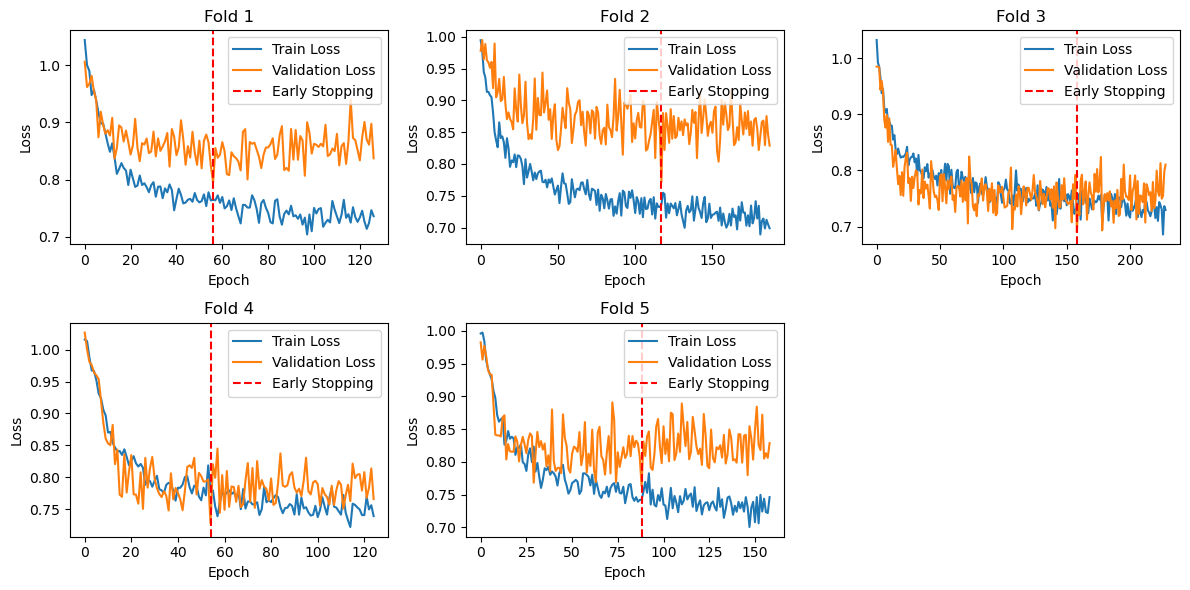

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [10]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-stuttgart-atp-singles',
                                            'past-hertogenbosch-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-stuttgart-atp-singles', 'past-hertogenbosch-atp-singles'} ...
... loaded 78 matches
Updating id table ...
... id table updated


Error 'n0dd' for match reW1aBTi in tournament past-stuttgart-atp-singles
Error 'g0gz' for match Q14yykQa in tournament past-stuttgart-atp-singles
Error 'g0a0' for match Oh6c4ESH in tournament past-hertogenbosch-atp-singles


100%|██████████| 2/2 [00:00<00:00, 49.40it/s]

Error 'g0a0' for match WYuCTZFk in tournament past-hertogenbosch-atp-singles
Error 'c0jt' for match Am1pF1lS in tournament past-hertogenbosch-atp-singles
Error 'h0eq' for match hEehX6PO in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match IJwypHBE in tournament past-hertogenbosch-atp-singles
Number of errors : 7 over 78 matches
Number of vectors : 71
Input shapes : [2, 40, 40, 4, 4, 15, 15]


  0%|          | 0/71 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 47
Test Loss: for 1 : 0.92
Test Loss: for 2 : 1.04
Test Loss: for 3 : 1.20
Test Loss: for 4 : 0.90
Test Loss: for 5 : 0.88


## Betting

In [16]:
CONFIDENCE_THRESHLOLD = 0.4


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - (1- prob)/(odds))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1
total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : j5cd4pTq Humbert U. - Brouwer G., bet on player 1, (0.86) amount to bet : 7.53, odds : 1.29, label : 1.00, total amount : 102.18
Match : COBghUGb De Minaur A. - Bergs Z., bet on player 1, (0.86) amount to bet : 7.42, odds : 1.12, label : 1.00, total amount : 103.07
Match : KhLLHALr Griekspoor T. - Vukic A., bet on player 1, (0.85) amount to bet : 7.64, odds : 1.30, label : 1.00, total amount : 105.36
Match : nctXlgGr De Minaur A. - Raonic M., bet on player 1, (0.83) amount to bet : 7.41, odds : 1.31, label : 1.00, total amount : 107.66
Match : SSk0APrK Berrettini M. - Shapovalov D., bet on player 1, (0.82) amount to bet : 7.64, odds : 1.55, label : 1.00, total amount : 111.86
Match : 0IDqU7O7 De Minaur A. - Korda S., bet on player 1, (0.82) amount to bet : 7.81, odds : 1.49, label : 1.00, total amount : 115.69
Match : b3tmyMSO Humbert U. - Fils A., bet on player 1, (0.78) amount to bet : 7.46, odds : 1.59, label : 1.00, total amount : 120.10
Match : On3pYZan Berrettini M. - Duc